In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('Position_Salaries.csv')
data


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# 'Level' is the feature and 'Salary' is the target
X = data[['Level']].values  # Features
y = data['Salary'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**
Fits a straight line through the data.

In [4]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.8451346684575974


## **Ridge Regression**
Like linear regression but with an L2 regularization term to reduce overfitting

In [5]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.8616126942201223


## **Lasso Regression**
Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

In [6]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



Lasso Regression R2: 0.8451346842125039


## **Decision Tree Regression**
Splits data into regions with similar values, capturing non-linear relationships.

In [7]:
tree_reg = DecisionTreeRegressor(random_state=42, )
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: 0.6046913580246913


## **Ensemble Method (Random Forest Regression)**
An ensemble of decision trees that improves stability and accuracy.

In [8]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.9217567160493827


## **Support Vector Regression (SVR)**
Uses kernels to fit complex patterns.

In [9]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



SVR R2: 0.9606333313709099


## **K-Nearest Neighbors (KNN) Regression**
Predicts the target by averaging the values of the closest data points.

In [10]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.768641975308642


## **Plots**

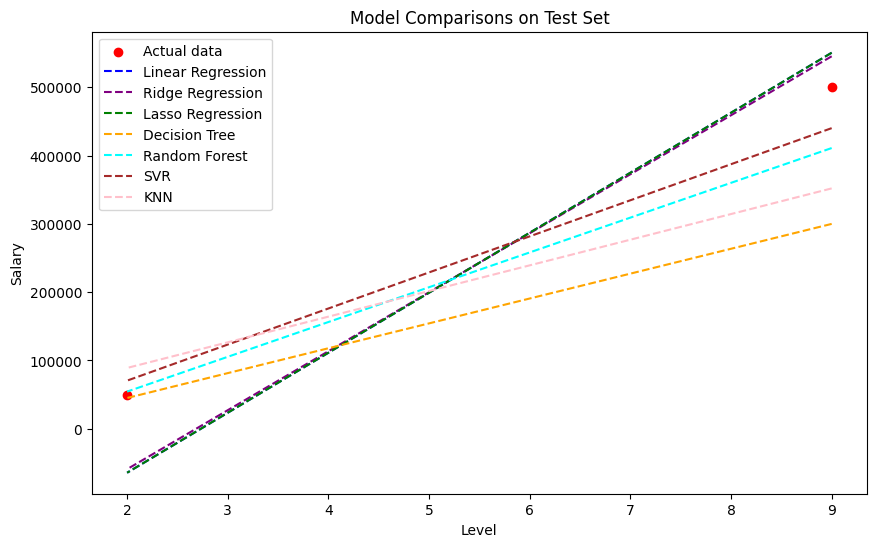

In [11]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()



## **Check for the whole data**

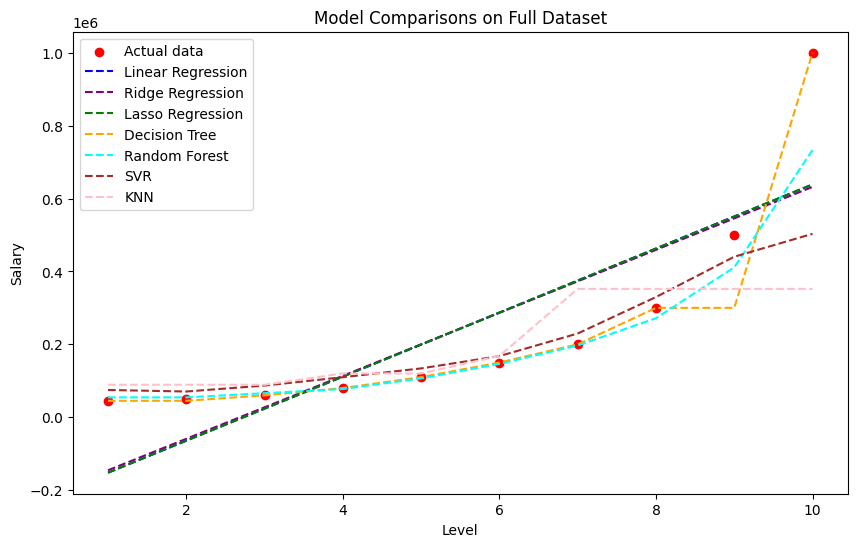

In [12]:
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')

# Plot each model's predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
